# Explosions

```{seealso} Learning Outcomes
- Understand the basics of explosions from:
    - Vapor Clouds
    - BLEVEs
    - TNT and high-explosives
    - Pressure vessels
- Be able to estimate over-pressures and associated damage
- Review GHS pictograms and NFPA 704 labels
- Review hazards analysis and flammability principles
```

```{note} Reading
- Foundations of Spiritual and Physical Safety: with Chemical Processes; Chapter 6, Sec. 2.3
```

## Vapor Cloud Explosions (VCE)

This a release of a flammable vapor cloud that then mixes with air and ignites. 

### In-class VCE demonstration

Isopropal alcohol has a LFL and UFL of 2% and 12% by volume. 

We could calculate or estimate:
- energy from the event
- internal pressure and 
- vent rate of the generated gases

Things to consider:
- ignition characteristics (laminar vs turbulent, top vs center ignition)
- flame speed   
- hazards analysis


## Boiling Liquid Expanding Vapor Explosions (BLEVE)

BLEVEs are a type of explosion that occurs when a vessel containing a liquid is heated to the point that the pressure exceeds the strength of the vessel. Once the vessel ruptures, the pressure falls rapidly and the hot liquid then quickly vaporizes and expands. It then can mix with air and ignite.

## High-Explosive Blasts

Image of TNT showing a solid piece melting. TNT melts at a relatively low temperature (~80C). TNT is usually melt casted into bombs or other shapes.

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/tnt.png?raw=true 
:width: 500px
:alt: TNT Melt Casting
:align: left
:label: TNT Melt Casting
TNT Melt Casting, By Daniel Grohmann - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=30126231
```

### Detonation

TNT detonates. That is, if boosted properly, the reaction front moves through the material at the detonation speed, approximately 7 km/s (much faster than the speed of sound in TNT).

### Deflagration

TNT, if not properly boosted, may only burn or deflagrate. The deflagration or burning reaction lasts much longer and thus the energy released per time is much smaller.

### TNT Equivalence and Blast Effects

TNT is a explosive that has been used for many years and is one of the most tested. TNT detonation blast pressures (both side-on and reflective), impulse (integral of the blast pressure with respect to time), and arrival times have been experimentally measured for spherical and hemispherical (ground level) blasts of TNT at various distances and various TNT masses. The data for those tests are given in the TM5-1300 document or in other references like UFC 3-340-02. These data have been fit to a model that is used to assess the hazards from explosions (of TNT or otherwise). If the explosive is not TNT, testing or modeling is done to determine the equivalent TNT mass. The TNT model (with the scaled TNT mass) is then used to assess the hazards. 

One very large hazard from TNT blasts is the shock wave (and blast wind) referred to as over-pressure. Typically, over-pressure is measured in psi (pounds per square inch) or kPa (kiloPascals). The over-pressure is the pressure above the ambient pressure. The over-pressure is a function of the distance from the explosion and the TNT mass. 



Overpressure blast effects are typically categorized as follows:

- \>0.4 psig: limited minor structural damage
- 0.4-1.0 psig: window breakage to partial demolition of houses
- 1-5 psig: significant damage to buildings to nearly complete destruction of houses
- \>5 psig: severe damage


There is approximately 4184 J of energy per gram of TNT. You can use that as an estimate for TNT equivalence given an energy output from a blast.

### TNT Overpressure Model

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/blastp.png?raw=true 
:width: 500px
:alt: TNT Blast Pressure
:align: left
:label: TNT Blast Pressure

Image of the TNT blast pressure and overpressure as a function of time. Credit to https://www.fema.gov/pdf/plan/prevent/rms/155/e155_unit_vi.pdf
```

The peak side-on overpressure can be estimated for a given mass of TNT from the following equation (hemispherical blast or blast on the ground): 

$$
\frac{p_o}{p_a} = \frac{1616\left [ 1 + \left ( \frac{z_e}{4.5}\right )^2\right ]}{\sqrt{1 + \left ( \frac{z_e}{0.048}\right )^2}\sqrt{1 + \left ( \frac{z_e}{0.32}\right )^2}\sqrt{1 + \left ( \frac{z_e}{1.35}\right )^2}}
$$

where $p_o$ is the overpressure in psig (gauge), $p_a$ is the ambient pressure in psia, and $z_e$ is the scaled distance (m/kg^1/3). $z_e$ is the distance in meters divided by the TNT (or equivalent) mass to the 1/3 power. Equation from G. F. Kinney and K. J. Graham. "Explosive Shocks in Air (Verlin, Germany: Springer-Verlag, 1985).

```{note}
More accurate alternatives to the above equation that are used throughout the defense community are described in UFC-340-02. The above equation is an estimate.
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def overpressure(pa, ze):
    numerator = 1616*(1 + (ze/4.5)**2)
    denom1 = np.sqrt(1 + (ze/0.048)**2)
    denom2 = np.sqrt(1 + (ze/0.32)**2)
    denom3 = np.sqrt(1 + (ze/1.35)**2)
    return pa*(numerator/(denom1*denom2*denom3))

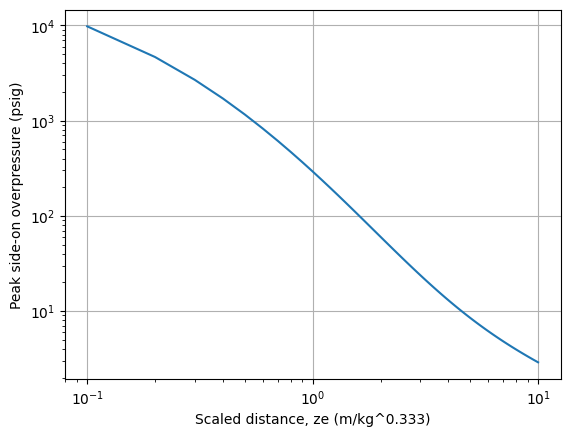

In [7]:
#plot the above relationship
ze = np.linspace(0.1, 10, 100)
pa = 14.7 #psi
po = overpressure(pa, ze)
plt.loglog(ze, po)
plt.xlabel('Scaled distance, ze (m/kg^0.333)')
plt.ylabel('Peak side-on overpressure (psig)')
plt.grid()


```{note}
Also given in the TM5-1300 document are the impulse as a function of the scaled distance. The impulse is the integral of the overpressure with respect to time. The damage from a blast depends both on the peak overpressure and the impulse. The impulse is a measure of the energy in the blast.
```

For example, using the above correlation, the peak overpressure at 100 m from a 1000 kg TNT blast is:


In [10]:
ze = 100/(1000**0.333)
po = overpressure(pa, ze)
print(f'At a distance of 100m, the peak side-on overpressure from a 1000 kg blast is {po:.2f} psig')

At a distance of 100m, the peak side-on overpressure from a 1000 kg blast is 2.89 psig


### Munroe Effect and Explosive Devices

The [Munroe effect](https://en.wikipedia.org/wiki/Shaped_charge#Munroe) is used in perforation guns for oil wells, armor piercing weapons, or other devices. The effect of the explosive can be significantly increased in a particular direction by shaping the explosive charge. The generated gases are focused in a particular direction and the pressure is thereby significantly increased.

#### Perforation Guns and Oil Recovery
Perforation guns are used in oil wells to create vias for oil to be recovered from otherwise impermeable layers. The gun has multiple perforation charges usually arranged in a spiral pattern. The charge creates a high pressure jet of solid copper or other malleable metal to punch a hole through the gun casing, through the bore lining and into the rock. The diameter of the holes vary but typically are about the diameter of your finger.

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/perforating-gun.jpg?raw=true 
:width: 500px
:alt: Perforating Gun
:align: left
:label: Perforating Gun

Shape charges in a perforating gun. Credit to https://www.scotonpetro.com/uploads/image/20180627/15/perforating-gun.jpg
```

````{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/perfcharge.png?raw=true 
:width: 500px
:alt: Perforating Charge
:align: left
:label: Perforating Charge

Images of shape charges with a copper lining. Credit to https://www.downhole-drillingtools.com/photo/pl21706160-steel_case_shaped_charges_for_oil_well_perforating_high_hardness_durable.jpg

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/perfchargegif.gif?raw=true 
:width: 500px
:alt: Perforating Charge GIF
:align: left
:label: Perforating Charge GIF

Shape charge gif animation. Credit to https://images.app.goo.gl/FV5818FRMUBCdnib7
```

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/oilprodus.png?raw=true 
:width: 500px
:alt: Oil Production US
:align: left
:label: Oil Production US

Crude Oil Production PLot. Credit to https://www.eia.gov/todayinenergy/detail.php?id=43015
```

## Pressurized Vessel Bursting
This is referred to in the book (Crowl and Louvar) as **Mechanical Explosions**.


In [20]:
P1 = 101325 # ambient pressure, Pa
P2 = np.linspace(101325, 1e7, 100) # pressure range, Pa
V = 1 # volume, m^3
gamma = 1.4 # ratio of specific heats
Ebrody = (P2 - P1)*V/(gamma - 1)/(1e6) # energy required to compress air, MJ
Eisoentropic = P2*V/(gamma - 1)*(1-(P1/P2)**((gamma-1)/gamma))/(1e6) # energy required to compress air isentropically, MJ
Eisothermal = P2*V*np.log(P2/P1)/(1e6) # energy required to compress air isothermally, MJ
Ecrowl = P2*V*(np.log(P2/P1) - (1-P1/P2))/(1e6) # energy required to compress air using Crowl's method, MJ
n = P2*V/(8.314*298)

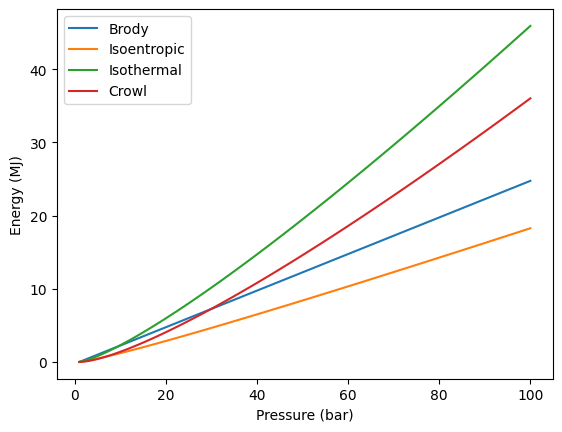

In [23]:
plt.plot(P2/1e5, Ebrody, label='Brody')
plt.plot(P2/1e5, Eisoentropic, label='Isoentropic')
plt.plot(P2/1e5, Eisothermal, label='Isothermal')
plt.plot(P2/1e5, Ecrowl, label='Crowl')
plt.xlabel('Pressure (bar)')
plt.ylabel('Energy (MJ)')
plt.legend(); plt.show()


*If you divide the energy by the number of moles in the volume (assuming room temperature) to get an energy per mole, you get the plot given in Figure 6-26 in the book. 

The above plot can then be used to estimate a TNT equivalent mass for the given energy and then thereby estimate the overpressure at a given distance.  

```{note}
The energy from fragments from a mechanical energy burst is approximately 5% of the product of the burst pressure of the structure (gauge) and the volume of the pressurized gas. 
```

```{warning} Action Items
1. Calculate the peak side-on overpressure for 5 pounds of TNT at a distance of 20 feet using the Kinney and Graham model given in Eq. VI.9{cite:p}`FSPSwCP`.
2. Explain the difference between a detonation and a deflagration in terms of reaction speed and pressure effects.
3. Compare Eq. VI.9{cite:p}`FSPSwCP` to an approximate line relating the overpressure to distance where the overpressure drops off as the square of the distance. In other words plot Eq. VI9 and also plot P $\propto$ a/d$^2$, where a is a value that best fits the other line and d is distance.
4. Which ignition location inside a spherical 20 liter sphere would yield the most violent pressure rate of rise? Why?
5. Calculate the stoichiometric concentration (in mg/m$^3$) of carbon black dust in a 20 liter sphere with particle size of 1 micron.
6. What's the normal boiling point of propane? At room temperature, what pressure is needed for a liquid to be present in a tank of 100% propane? If you raise the temperature of that tank with liquid propane present (and some propane vapor present), what relationship or relationshipos would govern the rise in pressure?
```